# Periodogram
Looking at seasonality of our well data. Possibly unnecessary, but :shrug:

Seems like it doesn't really give us more information than we already had: a yearly cycle with a bit of other weirdness that I don't think can be attributed to anything we can really define (el nino/la nina or something) since we only have 10 years of data rather than 100

In [1]:
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pytz

In [28]:
df = pd.read_pickle('../data-collection/data/all_data.pkl')

df['date']=pd.to_datetime(df.date)

## Extreme dates for the continuous well data
min_date = datetime(2006,2,7)
max_date = datetime(2017,9,28)

## Restrict data to those dates
df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()
df = df.reset_index()

In [29]:
display(df)
print(df.date[0])

,index,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,60,2006-02-07,64.300769,21.65,9420.0,0.0,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.0000,0.00,0.0
1,61,2006-02-08,64.221667,21.64,9380.0,0.0,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.0000,0.00,0.0
2,62,2006-02-09,64.200000,21.58,9210.0,0.0,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.7175,17.22,0.0
3,63,2006-02-10,64.280833,21.46,8830.0,0.0,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.0000,0.00,0.0
4,64,2006-02-11,64.380417,21.36,8550.0,0.0,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.0000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,4307,2017-09-24,69.101458,18.61,2400.0,0.0,58.008333,67.32,46.78,1018.500000,59.916667,92.0,33.0,5.311667,9.22,0.00,0.0000,0.00,0.0
4248,4308,2017-09-25,69.022083,18.61,2400.0,0.0,60.000833,69.15,52.63,1017.833333,59.583333,76.0,41.0,7.087917,13.87,3.44,0.0000,0.00,0.0
4249,4309,2017-09-26,68.966333,18.61,2390.0,0.0,59.716667,71.67,49.28,1021.250000,66.166667,89.0,39.0,4.746250,6.93,0.00,0.0000,0.00,0.0
4250,4310,2017-09-27,68.887042,18.62,2410.0,0.0,60.674167,75.42,48.49,1022.375000,66.958333,95.0,36.0,5.790833,9.22,0.00,0.0000,0.00,0.0


2006-02-07 00:00:00


In [35]:
# Shamelessly stolen from the kaggle learn course for time series
# https://www.kaggle.com/code/ryanholbrook/seasonality

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([.2,.5, 1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "5 year",
            "2 year",
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

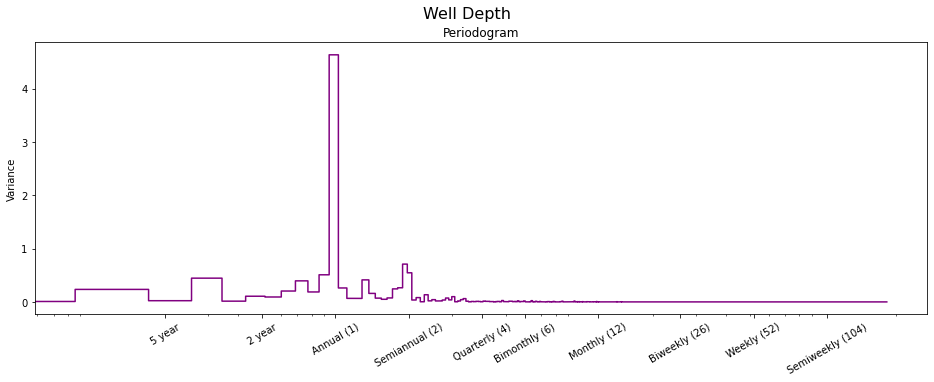

In [36]:
fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Well Depth', fontsize=16)

plot_periodogram(df.avg_well_depth, ax=ax1)